In [3]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

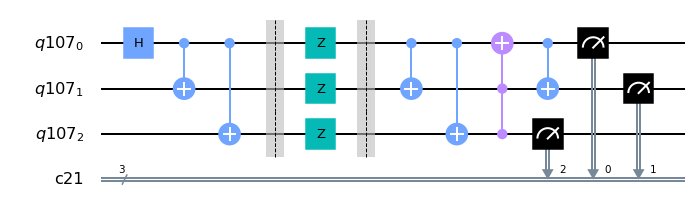

In [68]:
qb = QuantumRegister(3)
cb = ClassicalRegister(3)
mycircuit = QuantumCircuit(qb,cb)
mycircuit.h(0)
mycircuit.cnot(0,1)
mycircuit.cnot(0,2)
mycircuit.barrier()

#Noisy Channel#
mycircuit.z(qb)
mycircuit.barrier()
#Noisy Channel#


mycircuit.cnot(0,1)
mycircuit.cnot(0,2)
mycircuit.ccx(1,2,0)
mycircuit.cnot(0,1)
mycircuit.measure(qb,cb)
mycircuit.draw("mpl")

In [70]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(mycircuit, backend, shots=1000)
job.result().get_counts(mycircuit)

{'011': 497, '000': 503}

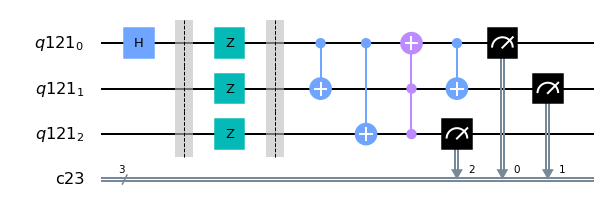

In [72]:
qb = QuantumRegister(3)
cb = ClassicalRegister(3)
mycircuit = QuantumCircuit(qb,cb)
mycircuit.h(0)
#mycircuit.cnot(0,1)
#mycircuit.cnot(0,2)
mycircuit.barrier()

#Noisy Channel#
mycircuit.z(qb)
mycircuit.barrier()
#Noisy Channel#


mycircuit.cnot(0,1)
mycircuit.cnot(0,2)
mycircuit.ccx(1,2,0)
mycircuit.cnot(0,1)
mycircuit.measure(qb,cb)
mycircuit.draw("mpl")

In [73]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(mycircuit, backend, shots=1000)
job.result().get_counts(mycircuit)

{'110': 502, '000': 498}